In [63]:
import numpy as np 
import pandas as pd

**DataSet Loading**

In [64]:
df = pd.read_csv(r"C:\Users\rakib\Downloads\diabetes_dataset.csv")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


# **Cleaning Process**

In [65]:
df.value_counts().T

age  gender  ethnicity  education_level  income_level  employment_status  smoking_status  alcohol_consumption_per_week  physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  screen_time_hours_per_day  family_history_diabetes  hypertension_history  cardiovascular_history  bmi   waist_to_hip_ratio  systolic_bp  diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  insulin_level  hba1c  diabetes_risk_score  diabetes_stage  diagnosed_diabetes
18   Female  Asian      Graduate         High          Employed           Never           0                             56                                  4.6         7.5                  3.5                        1                        0                     0                       29.0  0.86                111          77            74          195                52               108              195            134              178                   12.7

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [67]:
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.shape

(100000, 31)

# **Defining the Classification Problem:**

This is a supervised binary classification problem.

Goal: Predict whether an individual has been diagnosed with diabetes (positive class) or not (negative class) based on a set of health, demographic, and lifestyle features.
Alternative: Multi-class classification using diabetes_stage (e.g., "No Diabetes", "Pre-Diabetes", "Type 2", "Gestational"), but the primary focus is binary for simplicity and direct alignment with diagnosed_diabetes

# **Data Preprocessing & Feature Engineering**

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter
import shap
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Separate Features and Target
X = df.drop(columns=['diagnosed_diabetes' , 'diabetes_stage'])
y = df['diagnosed_diabetes']

In [72]:
#Identify Feature Types

#Numerical (numbers to scale)
numerical_cols = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score',
    'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes',
    'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio',
    'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
    'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial',
    'insulin_level', 'hba1c', 'diabetes_risk_score'
]

#Nominal (categories with no order) - One-Hot Encoding
nominal_cols = ['gender', 'ethnicity', 'employment_status', 'smoking_status']

#Ordinal (categories with order) - Ordinal Encoding
ordinal_cols = ['education_level', 'income_level']

#Define orders for ordinal
education_order = ['No formal', 'Highschool', 'Graduate', 'Postgraduate']
income_order = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']

#Quick print to check
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Nominal columns ({len(nominal_cols)}): {nominal_cols}")
print(f"Ordinal columns ({len(ordinal_cols)}): {ordinal_cols}")

Numerical columns (23): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']
Nominal columns (4): ['gender', 'ethnicity', 'employment_status', 'smoking_status']
Ordinal columns (2): ['education_level', 'income_level']


In [73]:
#Build the Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('nom', OneHotEncoder(drop='first'), nominal_cols),
        ('ord_edu', OrdinalEncoder(categories=[education_order, income_order]), ordinal_cols),
        ('ord_inc', OrdinalEncoder(categories=[income_order]), ['income_level'])
    ]
)

In [74]:
# Divide into train (60%), validation (20%), test (20%)
# First split: 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Second split: 20% val, 20% test from temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (60000, 29), Validation set: (20000, 29), Test set: (20000, 29)


In [75]:
# Fit the preprocessor only on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the fitted transformer to validation and test data
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

In [76]:
# Check for imbalance threshold
imbalance_ratio = Counter(y_train)[1] / len(y_train)
if imbalance_ratio > 0.2:
    print(f"Minority class ratio is {imbalance_ratio:.2f}, applying SMOTE to balance classes.")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
    print(f"SMOTE applied successfully.")
    print(f"Resampled training set shape: {X_train_resampled.shape}")
    print(f"Resampled class distribution: {Counter(y_train_resampled)}")
    final_X_train = X_train_resampled
    final_y_train = y_train_resampled
else:
    print(f"\nMinority class ratio in Training Set ({imbalance_ratio:.2f}) is >= 20%. SMOTE skipped.")
    final_X_train = X_train_preprocessed
    final_y_train = y_train

print("\n--- Final Processed Data Shapes ---")
print(f"Final Training Features (X_train): {final_X_train.shape}")
print(f"Final Training Target (y_train): {final_y_train.shape}")
print(f"Validation Features (X_val): {X_val_preprocessed.shape}")
print(f"Validation Target (y_val): {y_val.shape}")
print(f"Test Features (X_test): {X_test_preprocessed.shape}")
print(f"Test Target (y_test): {y_test.shape}")

Minority class ratio is 0.60, applying SMOTE to balance classes.
SMOTE applied successfully.
Resampled training set shape: (71998, 37)
Resampled class distribution: Counter({1: 35999, 0: 35999})

--- Final Processed Data Shapes ---
Final Training Features (X_train): (71998, 37)
Final Training Target (y_train): (71998,)
Validation Features (X_val): (20000, 37)
Validation Target (y_val): (20000,)
Test Features (X_test): (20000, 37)
Test Target (y_test): (20000,)


# **Model Training and Evaluation Function**

In [77]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(final_X_train, final_y_train)
y_pred_lr = lr.predict(X_val_preprocessed)
y_prob_lr = lr.predict_proba(X_val_preprocessed)[:, 1]

In [78]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(final_X_train, final_y_train)
y_pred_rf = rf.predict(X_val_preprocessed)
y_prob_rf = rf.predict_proba(X_val_preprocessed)[:, 1]

In [79]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(final_X_train, final_y_train)
y_pred_knn = knn.predict(X_val_preprocessed)
y_prob_knn = knn.predict_proba(X_val_preprocessed)[:, 1]

In [80]:
def evaluate_model(name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    return accuracy, f1, roc_auc

results = []
results.append(('Logistic Regression', evaluate_model('Logistic Regression', y_val, y_pred_lr, y_prob_lr)))
results.append(('Random Forest', evaluate_model('Random Forest', y_val, y_pred_rf, y_prob_rf)))
results.append(('KNN', evaluate_model('KNN', y_val, y_pred_knn, y_prob_knn)))

Logistic Regression - Accuracy: 0.8873, F1 Score: 0.9035, ROC-AUC: 0.9346
Random Forest - Accuracy: 0.9213, F1 Score: 0.9298, ROC-AUC: 0.9426
KNN - Accuracy: 0.7898, F1 Score: 0.8064, ROC-AUC: 0.8692


In [81]:
# Hyperparameter Tuning: Random Forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(final_X_train, final_y_train)
best_rf = rf_model.best_estimator_
y_pred_best_rf = best_rf.predict(X_val_preprocessed)
y_prob_best_rf = best_rf.predict_proba(X_val_preprocessed)[:, 1]

results.append(evaluate_model("Random Forest (Tuned)", y_val, y_pred_best_rf, y_prob_best_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest (Tuned) - Accuracy: 0.9216, F1 Score: 0.9301, ROC-AUC: 0.9451


In [82]:
from tabulate import tabulate

results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)

markdown_table = results_df.to_markdown(index=False)
print(markdown_table)



FINAL MODEL COMPARISON
| 0                   | 1                                                 |        2 |
|:--------------------|:--------------------------------------------------|---------:|
| Logistic Regression | (0.88735, 0.9035159093828958, 0.9345520520833333) | nan      |
| Random Forest       | (0.92125, 0.9298409728718429, 0.94258909375)      | nan      |
| KNN                 | (0.7898, 0.8064100202615583, 0.8692030833333333)  | nan      |
| 0.9216              | 0.9301060889720959                                |   0.9451 |


**So the Model Winner is Random Forest**

# **Advanced ML / Deep Learning Models**

In [83]:
# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric= 'auc', n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
# Cross-validation tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(final_X_train, final_y_train)

best_xgb = grid_search.best_estimator_
y_prob_xgb = best_xgb.predict_proba(X_val_preprocessed)[:, 1]

print(f'Best XGBoost Parameters: {grid_search.best_params_}')
print(f'XGBoost ROC-AUC: {roc_auc_score(y_val, y_prob_xgb):.4f}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150}
XGBoost ROC-AUC: 0.9471


In [84]:
# Defining MLP Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(final_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    final_X_train, final_y_train,
    validation_data=(X_val_preprocessed, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)
y_prob_mlp = model.predict(X_val_preprocessed).ravel()
print(f'Deep Learning ROC-AUC: {roc_auc_score(y_val, y_prob_mlp):.4f}')

Epoch 1/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9048 - loss: 0.2584 - val_accuracy: 0.9017 - val_loss: 0.2466
Epoch 2/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9233 - loss: 0.2207 - val_accuracy: 0.9086 - val_loss: 0.2346
Epoch 3/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9274 - loss: 0.2126 - val_accuracy: 0.9117 - val_loss: 0.2312
Epoch 4/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9295 - loss: 0.2081 - val_accuracy: 0.9136 - val_loss: 0.2313
Epoch 5/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9301 - loss: 0.2052 - val_accuracy: 0.9140 - val_loss: 0.2337
Epoch 6/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9311 - loss: 0.2022 - val_accuracy: 0.9136 - val_loss: 0.2304
Epoch 7/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9314 - loss: 0.2000 - val_accuracy: 0.9150 - val_loss: 0.2351
Epoch 8/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9325 - loss: 0

In [85]:
# Re-Train Best Baseline (Tuned Random Forest) for Comparison
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_search_rf.fit(final_X_train, final_y_train)

best_rf = grid_search_rf.best_estimator_
y_prob_rf_final = best_rf.predict_proba(X_val_preprocessed)[:, 1]
auc_rf_final = roc_auc_score(y_val, y_prob_rf_final)
print(f'Tuned Random Forest ROC-AUC: {auc_rf_final:.4f}')
print(f'Best RF Parameters: {grid_search_rf.best_params_}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuned Random Forest ROC-AUC: 0.9448
Best RF Parameters: {'max_depth': 20, 'n_estimators': 200}


In [86]:
#Comparing
models = {
    'Tuned Random Forest (Baseline)': auc_rf_final,
    'XGBoost': roc_auc_score(y_val, y_prob_xgb),
    'MLP': roc_auc_score(y_val, y_prob_mlp)
}

# Select best
best_model = max(models, key=models.get)
best_score = models[best_model]

print("\nModel Comparison:")
for name, score in models.items():
    print(f"{name}: {score:.4f}")

print(f"\nSelected Best Model: {best_model} with ROC-AUC {best_score:.4f}")


Model Comparison:
Tuned Random Forest (Baseline): 0.9448
XGBoost: 0.9471
MLP: 0.9440

Selected Best Model: XGBoost with ROC-AUC 0.9471


# **Confusion Matrix**

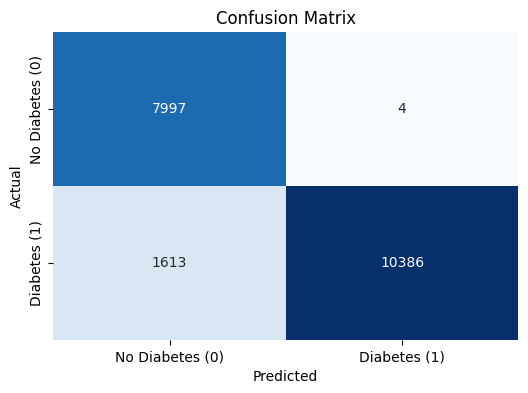

In [87]:
# predictions on test set
y_prob_test = best_rf.predict_proba(X_test_preprocessed)[:, 1]
y_pred_test = best_rf.predict(X_test_preprocessed)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes (0)", "Diabetes (1)"],
            yticklabels=["No Diabetes (0)", "Diabetes (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

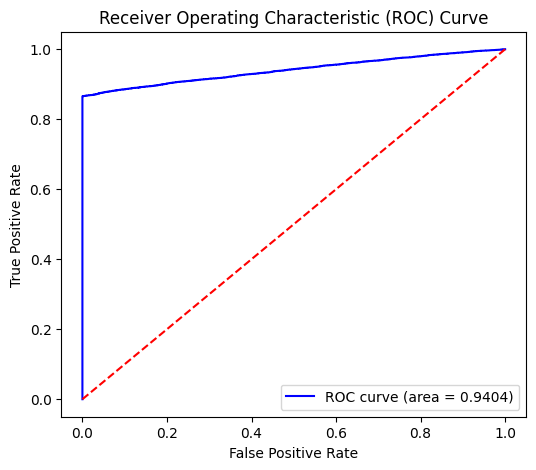

In [89]:
#ROC-AUC Curve
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

SyntaxError: expected 'except' or 'finally' block (3833722684.py, line 39)